# Table of Contents
01. Importing Libraries and Data
02. Data Cleaning
03. Data Prep For Regression Analysis
04. Regression Analysis

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
#define path
path = r'C:\Users\legra\Desktop\08-2022 Airline Delays Analysis'

In [4]:
#import data
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'airline_delay_wrangled2.csv'), index_col = False)

## 2. Data Cleaning

In [5]:
df.head()

,year,month,carrier,carrier_name,airport name,code,city,state,arriving_flight_count,arrival_delayed_15_minutes_more,...,security_delay_count,late_aircraft_count,arrival_cancelled_count,arrival_diverted_count,arrival_delay_minutes,carrier_delay_minutes,weather_delay_minutes,nas_delay_minutes,security_delay_minutes,late_aircraft_delay_minutes
0,2021,12,9E,Endeavor Air Inc.,Lehigh Valley International,ABE,Allentown/Bethlehem/Easton,PA,127,9.0,...,0.0,2.95,0,0,264,119,0,68,0,77
1,2021,12,9E,Endeavor Air Inc.,Southwest Georgia Regional,ABY,Albany,GA,73,11.0,...,0.0,1.87,0,0,342,125,0,142,0,75
2,2021,12,9E,Endeavor Air Inc.,Alexandria International,AEX,Alexandria,LA,62,8.0,...,0.0,1.15,0,0,439,156,0,103,0,180
3,2021,12,9E,Endeavor Air Inc.,Augusta Regional at Bush Field,AGS,Augusta,GA,166,18.0,...,0.0,2.74,0,1,1266,291,693,167,0,115
4,2021,12,9E,Endeavor Air Inc.,Albany International,ALB,Albany,NY,52,6.0,...,0.0,0.82,0,0,497,278,180,21,0,18


In [6]:
# Check for missing values

df.isnull().sum()

year                                 0
month                                0
carrier                              0
carrier_name                         0
airport name                         0
code                                 0
city                                 0
state                                0
arriving_flight_count                0
arrival_delayed_15_minutes_more    173
carrier_delay_count                  0
weather_delay_count                  0
nas_delay_count                      0
security_delay_count                 0
late_aircraft_count                  0
arrival_cancelled_count              0
arrival_diverted_count               0
arrival_delay_minutes                0
carrier_delay_minutes                0
weather_delay_minutes                0
nas_delay_minutes                    0
security_delay_minutes               0
late_aircraft_delay_minutes          0
dtype: int64

Values indicates flight that did not have a delay of 15 minutes or more

In [7]:
#check for duplicates
dups = df.duplicated()

In [8]:
dups.shape 

(38701,)

No duplicates

In [19]:
#select only entries with a non-zero arrival delayed 15 min more
df =df[df['arrival_delayed_15_minutes_more'] >= 1]

## 3. Data prep for Regression Analsis

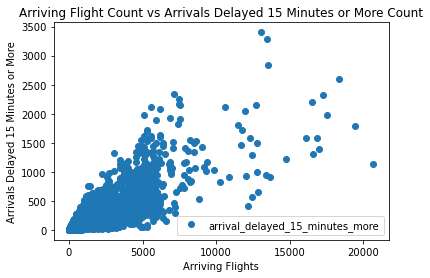

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'arriving_flight_count', y='arrival_delayed_15_minutes_more',style='o') 
plt.title('Arriving Flight Count vs Arrivals Delayed 15 Minutes or More Count')  
plt.xlabel('Arriving Flights')  
plt.ylabel('Arrivals Delayed 15 Minutes or More')  
plt.show()

Hypothesis: The more arriving flights an airport has, the higher the amount of arrivals delayed 15 minutes or more that airport will experience.

In [21]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['arriving_flight_count'].values.reshape(-1,1)
y = df['arrival_delayed_15_minutes_more'].values.reshape(-1,1)

In [22]:
X

array([[127],
       [ 73],
       [ 62],
       ...,
       [112],
       [  8],
       [246]], dtype=int64)

In [23]:
y

array([[ 9.],
       [11.],
       [ 8.],
       ...,
       [10.],
       [ 1.],
       [28.]])

In [24]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression Analysis

In [25]:
# Create a regression object.

regression = LinearRegression()

In [26]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

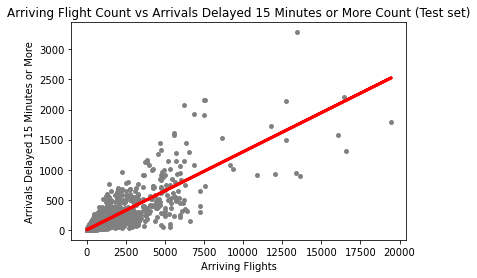

In [28]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Arriving Flight Count vs Arrivals Delayed 15 Minutes or More Count (Test set)')
plot_test.xlabel('Arriving Flights')
plot_test.ylabel('Arrivals Delayed 15 Minutes or More')
plot_test.show()

The line only partially fits the data. When arriving flights are under 5000 they more closely fit the line but as the number of flights increase pat ths 

In [29]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [30]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.12965106]]
Mean squared error:  4239.873816877993
R2 score:  0.7231377107478174


In [32]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,6.0,12.213112
1,32.0,29.845656
2,5.0,16.102644
3,7.0,5.860210
4,3.0,10.009044
5,9.0,9.231138
6,35.0,19.214269
7,62.0,155.996135
8,26.0,21.807290
9,11.0,8.971836


Based on the actual vs predicted values the model did not perform well on the test set. The MSE is very large meaning the the regression line is pretty far away from the data points even though the R2 is close to one which would usually indicate a good fit.